<a href="https://colab.research.google.com/github/fouziyaafreen/Airbnb-Bookings-Analysis-Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing necessery libraries for future analysis of the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/Capstone 1/'
file_name = 'Airbnb NYC 2019.csv'
df=pd.read_csv(working_dir_path + file_name)

#1. Exploratory Data Analysis (EDA)
EDA allows us to:



*   **Better understand the data**: Getting domain knowledge by reading some articles about the topic you are working on. You don't need to go to deep.
*   **Build intuition about the data**: Check if the data agree with the our domain knowledge.
*   **Generate hypotheses**: Understand how the data was generated, Find insights, and try to predict the output.
*   **Exploring anonymized data**: Explore individual features, check if the values match with our domain knowledge. Explore features relations.








In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
list(df['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Checking type of every column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.drop(['host_id','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
df.head(5)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,2018-10-19,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2019-05-21,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,2019-07-05,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,2018-11-19,1,0


In [9]:
df.describe() 

,id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,327.000000,365.000000


In [10]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [11]:
df.nunique()

id                                48895
name                              47905
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
last_review                        1764
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [49]:
df.last_review.fillna(method="ffill", inplace=True)

In [50]:
#Looking to find out first what columns have null values
#Using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum()

id                                 0
name                               0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
last_review                        0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [51]:
df=df[~df['name'].isnull()]

In [52]:
df.columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'last_review', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [53]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#2. Data Visualization
 

*   Visualize your data and search for pattern that can help you solve your problem.
*   Correlation analysis helps us to see features relatations.

In [19]:
new_df=df[['latitude','longitude','price','minimum_nights','calculated_host_listings_count','availability_365']].head()

In [20]:
corelation=new_df.corr()

<Figure size 1296x864 with 0 Axes>

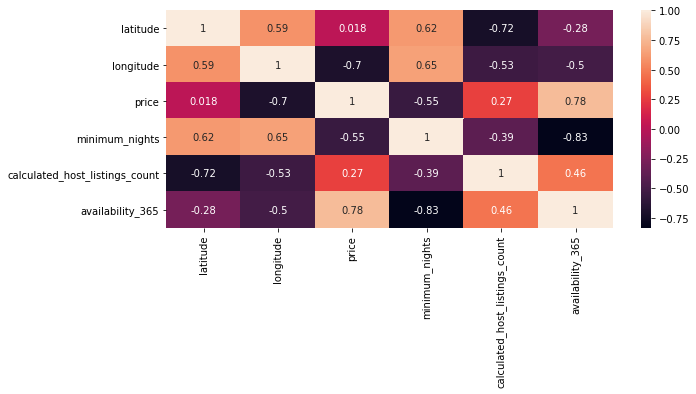

<Figure size 1296x864 with 0 Axes>

In [55]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)
plt.figure(figsize=(18,12))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group')

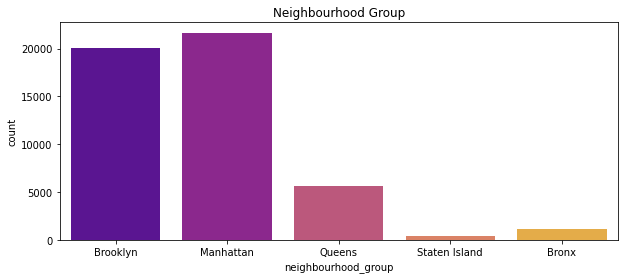

In [56]:
# Plot all Neighbourhood Group
sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
plt.title('Neighbourhood Group')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


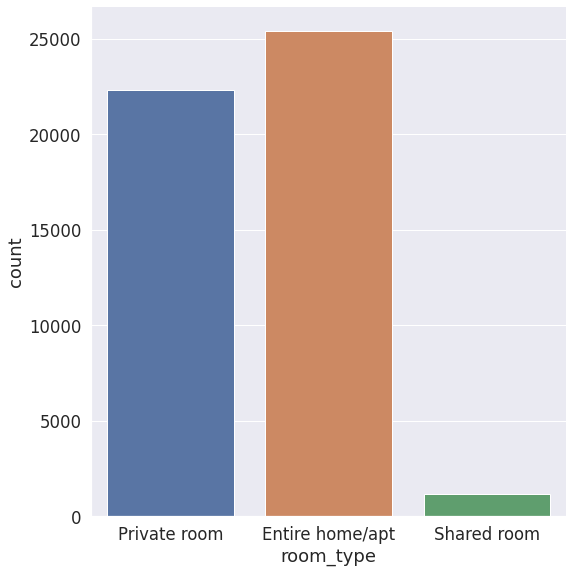

In [58]:
sns.set(font_scale=1.5)
sns.catplot("room_type", data=df, kind="count", height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood')

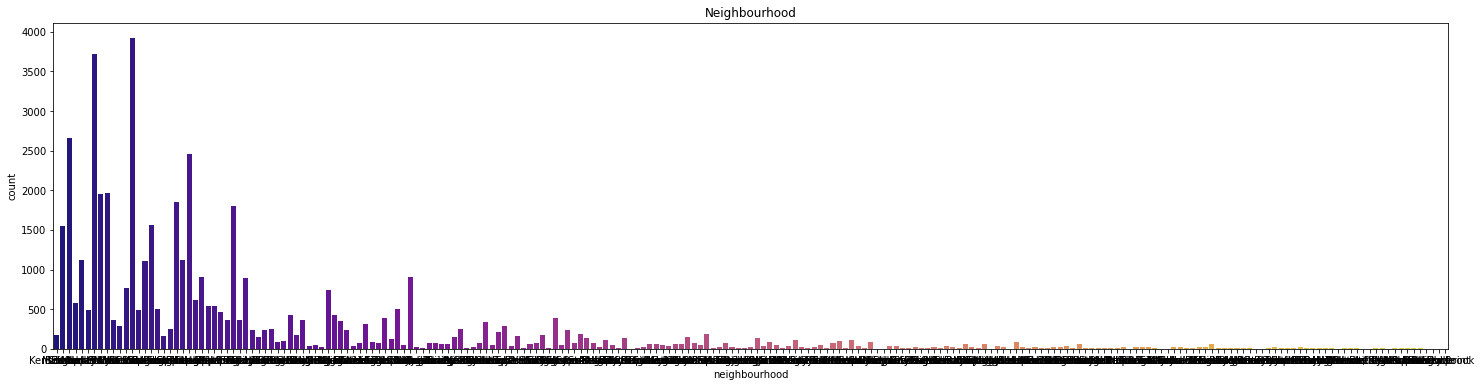

In [46]:
sns.countplot(df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

<BarContainer object of 10 artists>

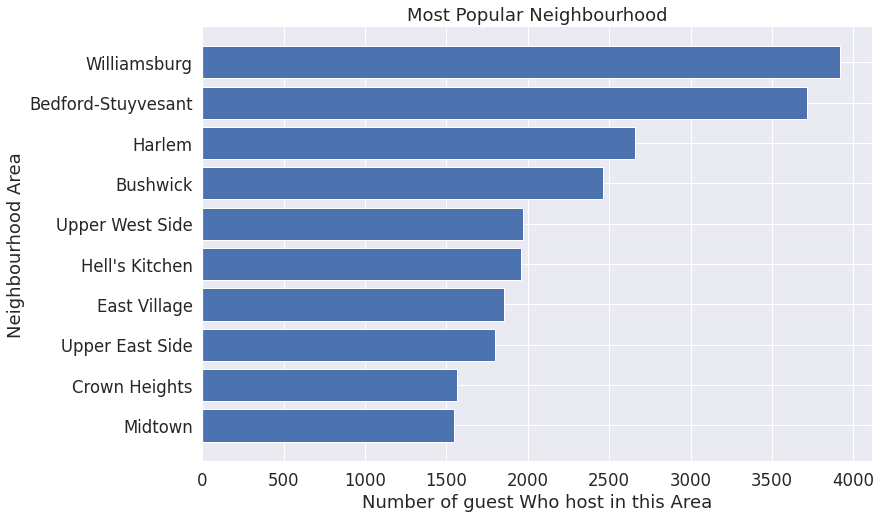

In [61]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


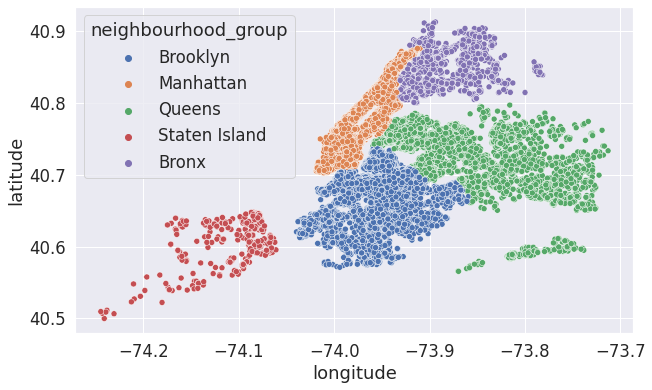

In [62]:
# Map of Neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

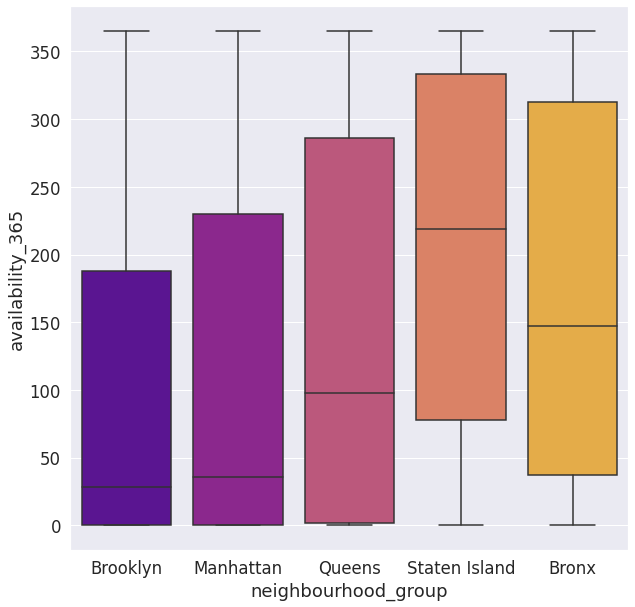

In [63]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

In [64]:
data=df['minimum_nights']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


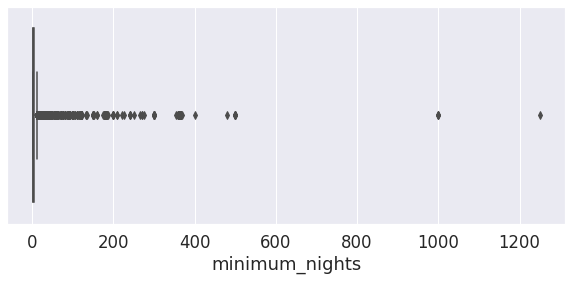

In [65]:
ax = sns.boxplot(data)

In [98]:
my_data=df[df['minimum_nights']<6]

In [99]:

my_data.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,2018-10-19,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2019-05-21,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,2019-05-21,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,2019-07-05,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,2019-06-22,1,129


In [100]:
data1=my_data['minimum_nights']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


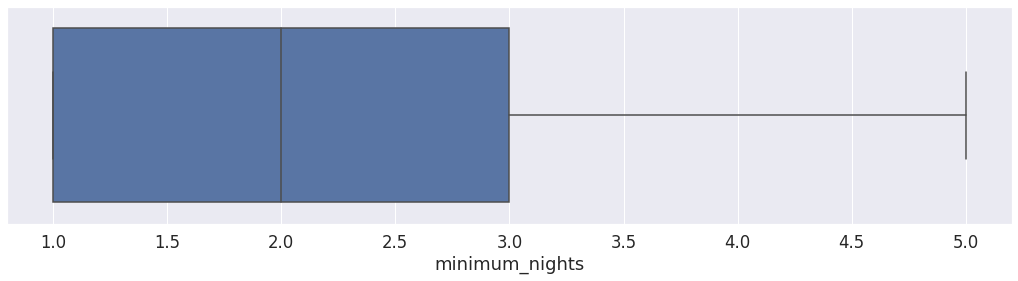

In [101]:
ax = sns.boxplot(data1)

In [102]:
my_data['minimum_nights'].describe()

count    38738.000000
mean         2.283546
std          1.224598
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: minimum_nights, dtype: float64

In [70]:
df['minimum_nights']

0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48879, dtype: int64

In [71]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48868 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48868 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_name                       48847 non-null  object 
 3   neighbourhood_group             48868 non-null  object 
 4   neighbourhood                   48868 non-null  object 
 5   latitude                        48868 non-null  float64
 6   longitude                       48868 non-null  float64
 7   room_type                       48868 non-null  object 
 8   price                           48868 non-null  int64  
 9   minimum_nights                  48868 non-null  int64  
 10  last_review                     48868 non-null  object 
 11  calculated_host_listings_count  48868 non-null  int64  
 12  availability_365                

In [72]:
df.columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'last_review', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [73]:
daily_price = df.groupby(['last_review','room_type'])['last_review'].count().unstack()

In [74]:
daily_price.head()

room_type,Entire home/apt,Private room,Shared room
last_review,,,
2011-03-28,NaN,1.0,NaN
2011-04-25,NaN,1.0,NaN
2011-05-12,NaN,1.0,NaN
2011-09-18,NaN,1.0,NaN
2011-09-19,NaN,1.0,NaN


Text(0.5, 0, 'Last Review')

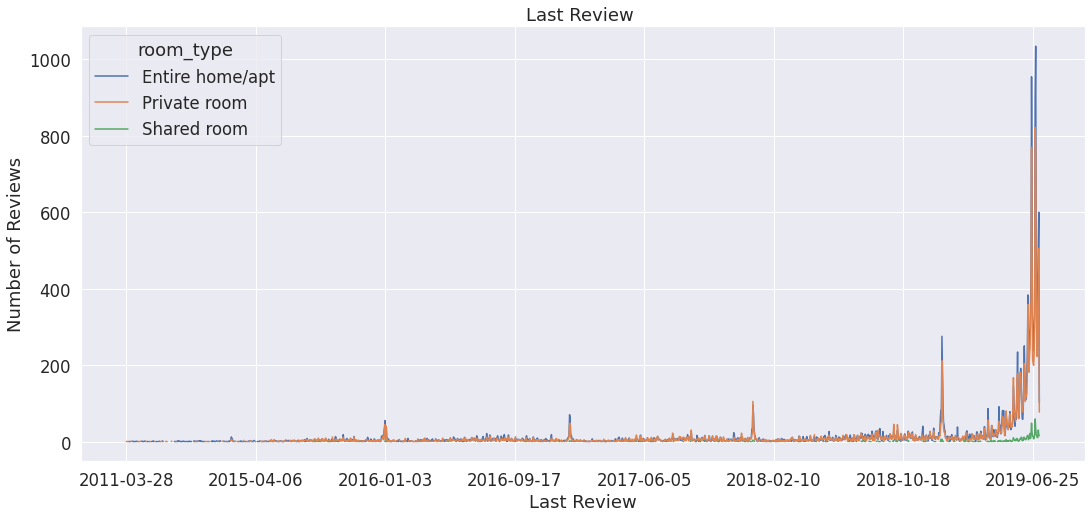

In [78]:
daily_price.plot()
plt.rcParams['figure.figsize'] = (18,4)

plt.title('Last Review ')
plt.ylabel('Number of Reviews')
plt.xlabel('Last Review')

By the above plot we can make a conclusion that the number of reviews increased in the year 2019 and most of the people refer Entire home/apt and average people refer Private rooms and shared rooms less preffered.

By the above plot we can make a conclusion that the manhattan and brooklyn prefered more than Queens, Bronx and Staten Island

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


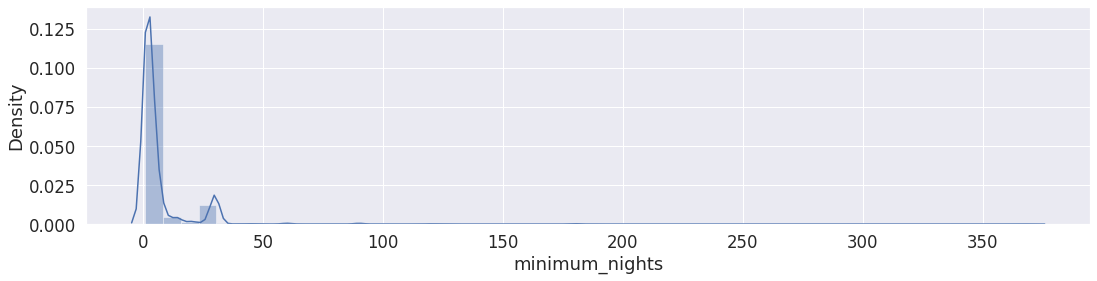

In [81]:
sns.distplot(my_data['minimum_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


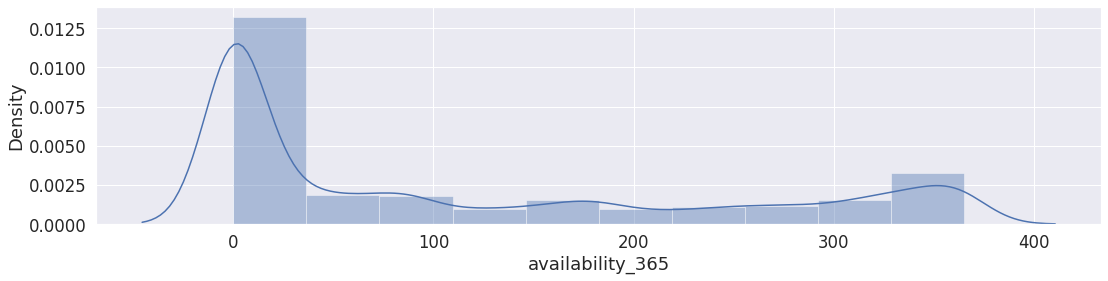

In [82]:
sns.distplot(my_data['availability_365'],bins=10)

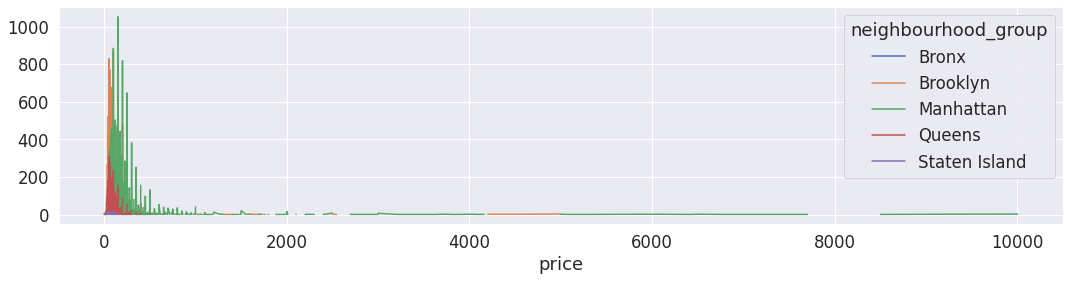

In [83]:
my_data.groupby(['price','neighbourhood_group'])['price'].count().unstack().plot()